Resources: https://www.kaggle.com/ferneutron/feature-extraction-with-different-methods

## Setting up

In [414]:
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing # To get MinMax Scaler function

# To plot inline
%matplotlib inline

# Evaluation
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# hide warnings
import warnings
#warnings.filterwarnings('ignore')

In [415]:
df = pd.read_csv('./datasets/feature_extracted.csv'
                 , sep=',', encoding='utf-8')
df.dropna();

In [416]:
# change label into binary classification
df.label.loc[(df['label'] >= 0.5)] = 1
df.label.loc[(df['label'] < 0.5)] = 0

In [417]:
# divide into training and test set
df = shuffle(df, random_state=123)
#df_train, df_test = train_test_split(df, test_size=0.2)

X = df.copy().drop(['statement','label'], axis=1)
X = X.fillna(0)
Y = df.copy()['label']
Y = Y.fillna(0)

In [418]:
# remove low variance data
sel_variance_threshold = VarianceThreshold()
X = pd.DataFrame(sel_variance_threshold.fit_transform(X))

In [419]:
# Initializing the MinMaxScaler function
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
# Scaling dataset keeping the columns name
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
#X_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns = X.columns)

In [420]:
# Splitting  up data, seting 75% for train and 25% for test.
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=43)

## Univariate selection (chi2)

In [421]:
# Initialize SelectKBest function
UnivariateFeatureSelection = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [422]:
# Creating a dict to visualize which features were selected with the highest score
feature_dict = {key:value for (key, value) in zip(
    UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(feature_dict.items())

[(1.7076235409258083e-05, 33),
 (7.52591041938711e-05, 43),
 (0.0001925184679003999, 29),
 (0.00022637664325695392, 38),
 (0.0004750871846395436, 22),
 (0.00047827396213290273, 26),
 (0.0009967922512371748, 44),
 (0.0011659473483277638, 6),
 (0.0014543908775812497, 28),
 (0.01402962362786361, 42),
 (0.01402962362787873, 41),
 (0.023394651803687085, 19),
 (0.02430712226810696, 31),
 (0.0445700043976944, 7),
 (0.047707980997530236, 4),
 (0.08457529734285085, 10),
 (0.16578602974558038, 3),
 (0.19145121141499466, 1),
 (0.2366445576907206, 11),
 (0.25216064485709877, 14),
 (0.27706849681218926, 0),
 (0.29435717156691155, 34),
 (0.3315982902218048, 18),
 (0.40687358543627805, 12),
 (0.41266319146719754, 13),
 (0.4213530377466457, 25),
 (0.4377996975190168, 74),
 (0.4563129253652416, 17),
 (0.7270755759830074, 9),
 (0.761112339094131, 21),
 (0.7930193282041658, 27),
 (0.8326677629779059, 15),
 (1.1373435589138872, 23),
 (1.1546749321465055, 36),
 (1.580146071938508, 16),
 (1.66823404507951, 

In [423]:
x_train_k_best_c2 = UnivariateFeatureSelection.transform(x_train)
x_test_k_best_c2 = UnivariateFeatureSelection.transform(x_test)

### Testing with RF

In [424]:
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(x_train_k_best_c2, y_train)
y_pred = RandForest_K_best.predict(x_test_k_best_c2)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5586942875078468


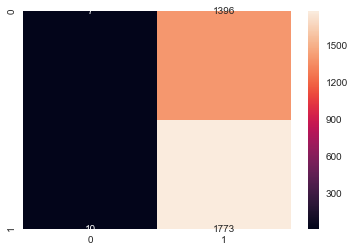

In [425]:
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Anova

In [426]:
# Initialize SelectKBest function
self_f = SelectKBest(f_classif, k=5).fit(x_train, y_train)

In [427]:
feature_dict_f = {key:value for (key, value) in zip(
    sel_f.scores_, x_train.columns)}
sorted(feature_dict_f.items())

[(0.00024960045959786627, 33),
 (0.0010997792880481784, 43),
 (0.001781376080172353, 22),
 (0.002814592302807648, 29),
 (0.0030556347447830176, 38),
 (0.0042531038522355446, 6),
 (0.0064483099898437505, 26),
 (0.011275150562998344, 45),
 (0.01325575849509428, 44),
 (0.019617844338459225, 28),
 (0.09568736248588895, 4),
 (0.10543185800035806, 19),
 (0.1760781545403446, 7),
 (0.21954038746322044, 42),
 (0.3548595500787872, 31),
 (0.5035898946824009, 3),
 (0.6046539420279767, 1),
 (0.7930021465735753, 27),
 (1.2330874643754017, 18),
 (1.5637338449966545, 25),
 (1.6226982573344109, 30),
 (2.5661871793103352, 21),
 (2.8335180514941842, 32),
 (2.903924485855326, 16),
 (3.4550178500097135, 10),
 (3.5867180967062593, 0),
 (3.716093497751544, 23),
 (4.382839887907411, 34),
 (5.190446025353597, 36),
 (5.6080067022675255, 5),
 (6.5639642703302945, 8),
 (7.453787466076412, 2),
 (14.030533138785003, 9),
 (15.107826888085064, 11),
 (15.649655959866372, 14),
 (18.027479382236308, 13),
 (21.6619188161

In [428]:
x_train_k_best_f = sel_f.transform(x_train)
x_test_k_best_f = sel_f.transform(x_test)

In [429]:
RandForest_K_best_f = RandomForestClassifier()      
RandForest_K_best_f = RandForest_K_best.fit(x_train_k_best_f, y_train)
y_pred = RandForest_K_best.predict(x_test_k_best_f)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5160075329566854


## Mutual information

In [430]:
sel_mutual = SelectKBest(mutual_info_classif, k=5)
X_train_mutual = sel_mutual.fit_transform(x_train, y_train)

In [431]:
x_train_k_best_m = sel_f.transform(x_train)
x_test_k_best_m = sel_f.transform(x_test)

In [432]:
RandForest_K_best_m = RandomForestClassifier()      
RandForest_K_best_m = RandForest_K_best.fit(x_train_k_best_m, y_train)
y_pred = RandForest_K_best.predict(x_test_k_best_m)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5263653483992468


## Recursive Feature Elimination

In [433]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=5, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)

In [434]:
print("Best features chosen by RFE: \n")
for i in x_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

11
13
14
15
17


In [435]:
x_train_RFE = rfe.transform(x_train)
x_test_RFE = rfe.transform(x_test)
RandForest_RFE = RandForest_RFE.fit(x_train_RFE, y_train)
y_pred = RandForest_RFE.predict(x_test_RFE)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.4987445072190835


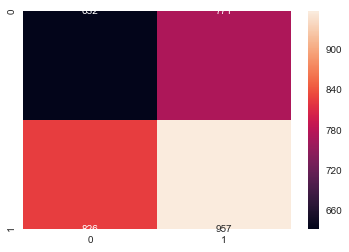

In [436]:
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Recursive Feature Elimination with Cross-Validation

In [437]:
# Initialize the Random Forest Classifier
RandForest_RFECV = RandomForestClassifier() 
# Initialize the RFECV function setting 3-fold cross validation
rfecv = RFECV(estimator=RandForest_RFECV, step=1, cv=3, scoring='accuracy')
# Fit data
rfecv = rfecv.fit(x_train, y_train)

print('Best number of features :', rfecv.n_features_)
print('Features :\n')
for i in x_train.columns[rfecv.support_]:
    print(i)

Best number of features : 71
Features :

0
1
3
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
30
31
33
34
35
36
37
38
41
42
43
44
45
46
47
48
50
51
52
53
54
55
56
58
61
62
63
65
67
68
69
70
71
72
73
74
76
77
78
79
80
82
83
84
85
86
87


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'Score of Selected Features')

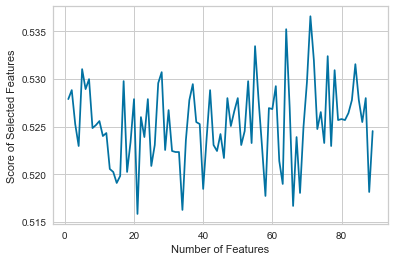

In [438]:
plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Score of Selected Features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Tree based Feature Selection

In [439]:
# Initialize the Random Forest Classifier
RandForest_Tree = RandomForestClassifier()  
# Fit the random forest with the original data
RandForest_Tree = RandForest_Tree.fit(x_train, y_train)
# Getting the relevance between features
relevants = RandForest_Tree.feature_importances_

In [440]:
# Apply the tree based on importance for the random forest classifier and indexing it
std = np.std([tree.feature_importances_ for tree in RandForest_Tree.estimators_], axis=0)
indices = np.argsort(relevants)[::-1]

In [441]:
# Printting the ranking of importance
print("Feature Rank:")

for i in range(x_train.shape[1]):
    print("%d. Feature %d (%f)" 
          % (i + 1, indices[i], relevants[indices[i]]))

Feature Rank:
1. Feature 13 (0.122218)
2. Feature 11 (0.110100)
3. Feature 17 (0.076473)
4. Feature 12 (0.076259)
5. Feature 14 (0.073533)
6. Feature 15 (0.070926)
7. Feature 24 (0.038352)
8. Feature 10 (0.032575)
9. Feature 9 (0.028634)
10. Feature 83 (0.024742)
11. Feature 0 (0.021909)
12. Feature 34 (0.015047)
13. Feature 8 (0.014851)
14. Feature 61 (0.012909)
15. Feature 7 (0.012516)
16. Feature 80 (0.011842)
17. Feature 78 (0.009803)
18. Feature 70 (0.009734)
19. Feature 69 (0.009510)
20. Feature 36 (0.009090)
21. Feature 52 (0.008936)
22. Feature 86 (0.008112)
23. Feature 6 (0.007902)
24. Feature 54 (0.006861)
25. Feature 35 (0.006808)
26. Feature 19 (0.006600)
27. Feature 77 (0.006460)
28. Feature 87 (0.006237)
29. Feature 58 (0.006162)
30. Feature 23 (0.006053)
31. Feature 50 (0.005902)
32. Feature 67 (0.005467)
33. Feature 63 (0.005430)
34. Feature 65 (0.005406)
35. Feature 41 (0.005286)
36. Feature 51 (0.005061)
37. Feature 84 (0.004839)
38. Feature 37 (0.004814)
39. Feature 

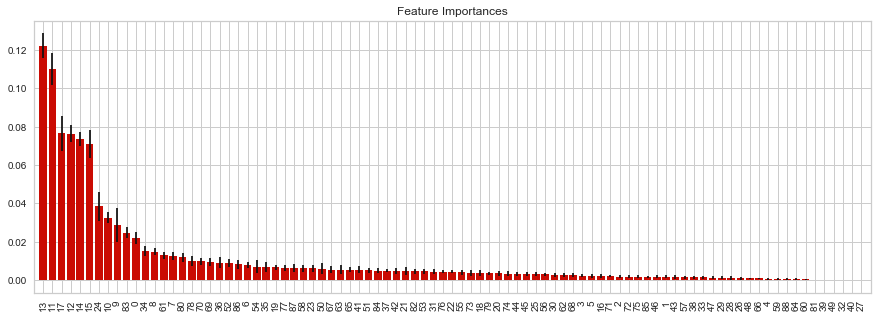

In [442]:
# Plotting the feature importances
plt.figure(1, figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), relevants[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show();

## Feature Extraction through PCA

In [443]:
# Initializing PCA and fitting
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

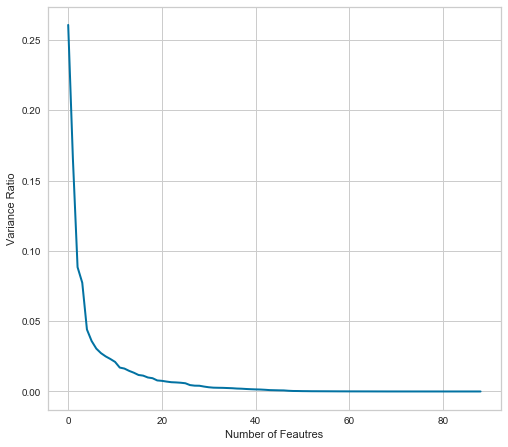

In [444]:
# Plotting to visualize the best number of elements
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')
plt.show();

## Before feature selection

In [445]:
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(x_train, y_train)
predict = model_logistic.predict(x_test)
print("confusion matrix", confusion_matrix(y_test, predict))
print("accuracy score:", accuracy_score(y_test, predict))
print("f1 score:", f1_score(y_test, predict))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

confusion matrix [[ 324 1079]
 [ 269 1514]]
accuracy score: 0.5768989328311362
f1 score: 0.6919561243144424


## After feature selection

In [447]:
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(x_train_k_best_c2, y_train)
predict = model_logistic.predict(x_test_k_best_c2)
print("confusion matrix", confusion_matrix(y_test, predict))
print("accuracy score:", accuracy_score(y_test, predict))
print("f1 score:", f1_score(y_test, predict))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

confusion matrix [[   5 1398]
 [   2 1781]]
accuracy score: 0.5605775266792216
f1 score: 0.7178557033454253
